In [1]:
import numpy as np
from sklearn.datasets import load_iris 
iris = load_iris() 
X = iris.data.astype(np.float32) 
y_true = iris.target.astype(np.int32)

In [2]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
from sklearn.preprocessing import OneHotEncoder
y_onehot = OneHotEncoder().fit_transform(y_true.reshape(-1, 1))
y_onehot = y_onehot.astype(np.int64).todense()

E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, random_state=14)

In [5]:
input_layer_size, hidden_layer_size, output_layer_size = 4, 6, 3

In [6]:
from keras.layers import Dense
hidden_layer = Dense(output_dim=hidden_layer_size, input_dim=input_layer_size, activation='relu')
output_layer = Dense(output_layer_size, activation='sigmoid')

Using TensorFlow backend.
E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, input_dim=4, activation="relu")`
  from ipykernel import kernelapp as app


In [7]:
from keras.models import Sequential
model = Sequential(layers=[hidden_layer, output_layer])

In [8]:
model.compile(loss='mean_squared_error',
    optimizer='adam',
    metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train)

Epoch 1/1
112/112 [==============================] - 0s 2ms/step - loss: 0.3640 - acc: 0.0089


In [10]:
print(history.history)

{'loss': [0.36404245666095186], 'acc': [0.008928571428571428]}


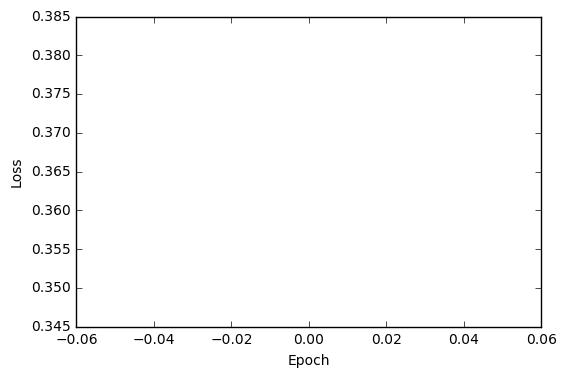

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(history.epoch, history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [12]:
from sklearn.metrics import classification_report
y_pred = model.predict_classes(X_test)
print(classification_report(y_true=y_test.argmax(axis=1), y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         8

   micro avg       0.00      0.00      0.00        38
   macro avg       0.00      0.00      0.00        38
weighted avg       0.00      0.00      0.00        38



E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
history = model.fit(X_train, y_train, nb_epoch=1000, verbose=False)

E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


In [14]:
y_pred = model.predict_classes(X_test)
print(classification_report(y_true=y_test.argmax(axis=1), y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

   micro avg       1.00      1.00      1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

